In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
srate = 1000
time = np.arange(0, srate) / srate

signal = np.concat([np.sin(2*np.pi*10*time), np.sin(2*np.pi*10*time[::-1])])

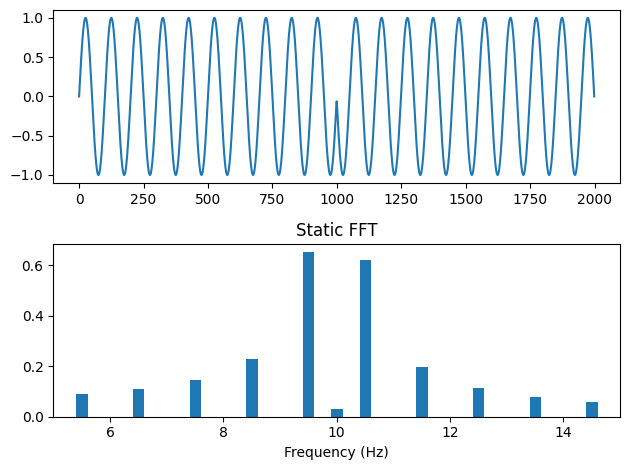

In [3]:
plt.subplot(211)
plt.plot(signal)

plt.subplot(212)
plt.bar(np.linspace(0, srate, len(signal)), 2*abs(scipy.fft.fft(signal)/len(signal)), width=0.2)
plt.xlim([5, 15])
plt.title("Static FFT")
plt.xlabel("Frequency (Hz)")
plt.tight_layout()

In [4]:
winlen = 500
skip = 100

hzL = np.linspace(0, srate/2, winlen//2)

welchspect = np.zeros(len(hzL))

hwin = .5*(1-np.cos(2*np.pi*np.arange(0, winlen) / (winlen)))

nbins = 0

for ti in range(0, len(signal)-winlen, skip):
    tidx = np.arange(ti, ti+winlen-1)
    tmpdata = signal[0:len(tidx)+1]

    x = scipy.fft.fft(hwin*tmpdata)/winlen
    
    welchspect = welchspect + abs(x[:len(hzL)])**2
    nbins = nbins + 1

welchspect = welchspect / nbins

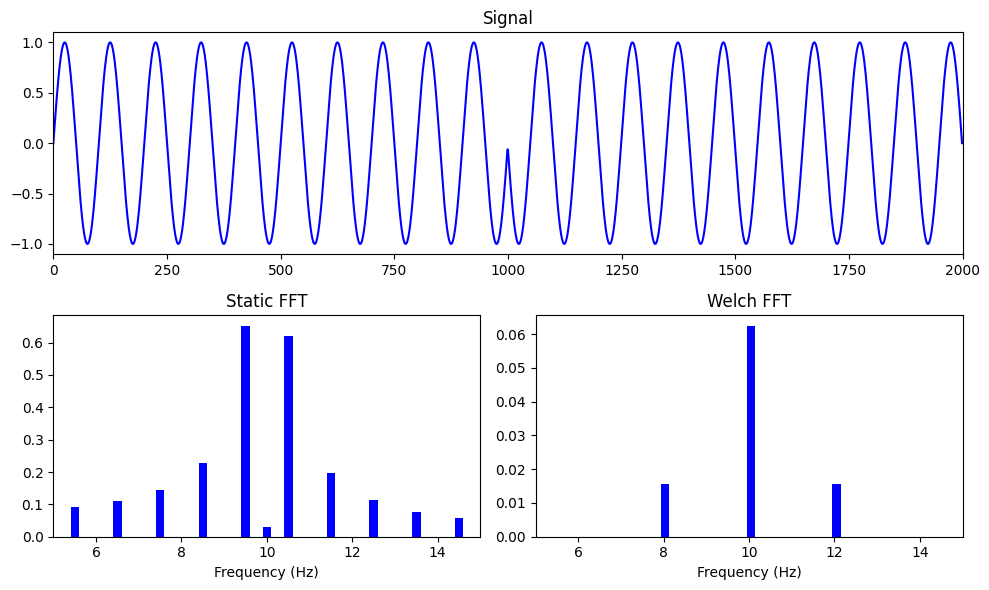

In [5]:
fig = plt.figure(figsize=(10, 6))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.plot(signal, color='b')
ax1.set_title("Signal")
ax1.set_xlim(0, len(signal))

ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.bar(np.linspace(0, srate, len(signal)), 2 * abs(scipy.fft.fft(signal) / len(signal)), width=0.2, color='b')
ax2.set_xlim([5, 15])
ax2.set_title("Static FFT")
ax2.set_xlabel("Frequency (Hz)")

ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.bar(hzL, welchspect, width=0.2, color='b')
ax3.set_xlim([5, 15])
ax3.set_title("Welch FFT")
ax3.set_xlabel("Frequency (Hz)")

plt.tight_layout()